In [71]:
points = {16: 33, 16 + 13: 34, 16 + 62: 40, 16 + 31 * 3: 51, 16 + 31 * 4: 60, 16 + 31 * 5: 69, 16 + 31 * 6: 75, 16 + 31 * 7: 74, 16 + 31 * 8: 67, 16 + 31 * 9: 56, 16 + 31 * 10: 47, 16 + 31 * 11: 38}


In [72]:
def fit(points):
    # calculation for A^T * A
    n = len(points)
    sum_x6 = sum(t**6 for t in points.keys())
    sum_x5 = sum(t**5 for t in points.keys())
    sum_x4 = sum(t**4 for t in points.keys())
    sum_x3 = sum(t**3 for t in points.keys())
    sum_x2 = sum(t**2 for t in points.keys())
    sum_x = sum(points.keys())
    sum_y = sum(points.values())
    sum_xy = sum(p * points[p] for p in points)
    sum_x2y = sum(p**2 * points[p] for p in points)
    sum_x3y = sum(p**3 * points[p] for p in points)
    # calculation for A^T * b
    LHS = [[sum_x6, sum_x5, sum_x4, sum_x3], [sum_x5, sum_x4, sum_x3, sum_x2], [sum_x4, sum_x3, sum_x2, sum_x], [sum_x3, sum_x2, sum_x, n]]
    RHS = [sum_x3y, sum_x2y, sum_xy, sum_y]

    # Solve for LHS * [a3, a2, a1, a0]^T = RHS
    # Gaussian elimination
    for i in range(4):
        max_row = max(range(i, 4), key=lambda r: abs(LHS[r][i]))
        LHS[i], LHS[max_row] = LHS[max_row], LHS[i]
        RHS[i], RHS[max_row] = RHS[max_row], RHS[i]
        for j in range(i + 1, 4):
            factor = LHS[j][i] / LHS[i][i]
            for k in range(i, 4):
                LHS[j][k] -= factor * LHS[i][k]
            RHS[j] -= factor * RHS[i]

    # Back substitution
    a0 = RHS[3] / LHS[3][3]
    a1 = (RHS[2] - LHS[2][3] * a0) / LHS[2][2]
    a2 = (RHS[1] - LHS[1][2] * a1 - LHS[1][3] * a0) / LHS[1][1]
    a3 = (RHS[0] - LHS[0][1] * a2 - LHS[0][2] * a1 - LHS[0][3] * a0) / LHS[0][0]

    return a0, a1, a2, a3

In [73]:
a0, a1, a2, a3 = fit(points)
print(f"P3(t) = {round(a3, 5)}t^3 + {round(a2, 5)}t^2 + {round(a1, 5)}t + {round(a0, 5)}")


P3(t) = -0.0t^3 + 0.00098t^2 + 0.17299t + 27.73155


In [74]:
def P3(x):
    return a3 * x**3 + a2 * x**2 + a1 * x + a0

print(f"P(June 4) = {round(P3(4 + 31 * 5), 2)} degrees\nP(December 25) = {round(P3(25 + 31 * 11), 2)} degrees")

P(June 4) = 64.02 degrees
P(December 25) = 27.29 degrees


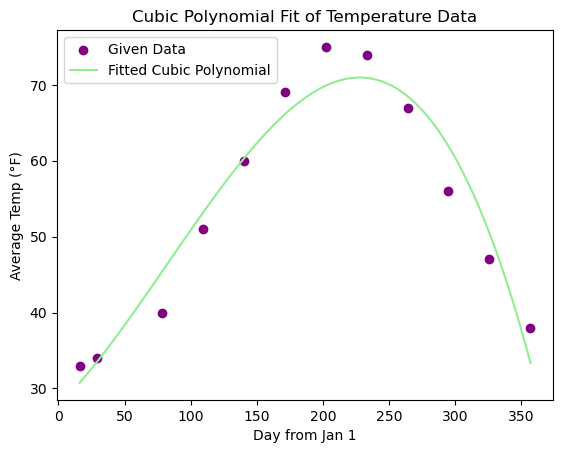

In [75]:
import matplotlib.pyplot as plt

# Compute fitted values for plotting
t, y = points.keys(), points.values()
t_smooth = [min(t) + i * (max(t) - min(t)) / 100 for i in range(101)]
y_smooth = [P3(x) for x in t_smooth]

# Plot the data points and fitted polynomial
plt.scatter(t, y, color='purple', label='Given Data')
plt.plot(t_smooth, y_smooth, label='Fitted Cubic Polynomial', color='lightgreen')
plt.xlabel('Day from Jan 1')
plt.ylabel('Average Temp (°F)')
plt.legend()
plt.title('Cubic Polynomial Fit of Temperature Data')
plt.show()


In [90]:
def f(t):
    return P3(t) - 64.89

def secant(fun = f, x0 = 31 * 4, x1 = 31 * 7, tol = 5e-5, max = 100):
    i = 0 # counter for iterations
    while i < max:
        i += 1
        x2 = x1 - fun(x1) * (x1 - x0) / (fun(x1) - fun(x0)) 
        if abs(x2 - x1) < tol:
            return x2
        x0 = x1
        x1 = x2
    raise RuntimeError

In [ ]:
try:
    # find both days, one is from May to August, the other is August to November
    day1 = secant(x0 = 31 * 4, x1 = 31 * 7)
    day2 = secant(x0 = 31 * 7, x1 = 31 * 10)
    print(f"Day1: {day1}")
    print(f"Day2: {day2}")
except RuntimeError as e:
    print(e)

Day1: 163.85138863166165
Day2: 283.5432132731596
